## Importando os módulos necessários

In [2]:
#Importing the modules
import pandas as pd
import numpy as np

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
import pickle

import shap

## Subindo e upando os dados

In [3]:
dados = pd.read_csv('Predicao_CO2.csv', sep=';')

In [4]:
#Calculando a média e o desvio padrão do CO2
dados.fillna(0)
m=np.mean(dados['CO2'])
d=np.std(dados['CO2'])
a = (m+2*d)
b = m-2*d
print(a,b)

62089.82584516186 15291.363582150909


In [5]:
dados.drop(dados[dados.CO2 >a].index, inplace=True)
dados.drop(dados[dados.CO2 <b].index, inplace=True)
dados_tratados = dados
dados_tratados.count()

L_501        427
L_503        427
L_511C       427
L_511R       427
L_512        427
L_521        427
L_551        427
L_561        427
L_562        427
Trasfega     427
Filtracao    427
Brassagem    427
CO2          427
dtype: int64

In [6]:
X = dados_tratados.drop('CO2', axis=1)
y= dados_tratados['CO2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

regressor = RandomForestRegressor(n_estimators = 1000, random_state = 0, max_depth=10)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


(array([ 3.,  4.,  8., 13.,  9.,  8., 14., 14., 17., 17.]),
 array([25302.55766667, 27757.40980333, 30212.26194   , 32667.11407667,
        35121.96621334, 37576.81835001, 40031.67048667, 42486.52262334,
        44941.37476001, 47396.22689668, 49851.07903335]),
 <BarContainer object of 10 artists>)

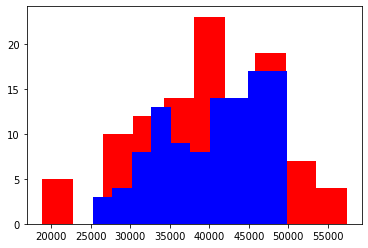

In [7]:

df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df
plt.hist(y_test, color ='r')
plt.hist(y_pred, color ='b')

In [8]:
#Métricas do modelo

# Erro absoluto
errors = abs(y_pred - y_test)
error_rf = round(np.mean(errors), 2)
mape = 100 * (errors / y_test)

# Acurácia
accuracy_rf = 100 - np.mean(mape)
accuracy_rf = round(accuracy_rf, 2)

#Erros
MeanSquaredError = metrics.mean_squared_error(y_test,y_pred)
RootMeanSquaredError = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

#Dicionario com a metricas do modelo
Resultados = {
"Erro_Absoluto": error_rf,
"Acuracia_RandomForest": accuracy_rf,
"Erro_Medio_Quadrado": MeanSquaredError,
"RSME": RootMeanSquaredError,
}
print(Resultados)

{'Erro_Absoluto': 3791.68, 'Acuracia_RandomForest': 89.35, 'Erro_Medio_Quadrado': 23450591.208288383, 'RSME': 4842.581048189941}


## Plotando a importância das features com SHAP

In [10]:
#Guardando os nomes das features em uma lista
comentarios = list(dados_tratados)
comentarios.remove(comentarios[12])
print(comentarios)

['L_501', 'L_503', 'L_511C', 'L_511R', 'L_512', 'L_521', 'L_551', 'L_561', 'L_562', 'Trasfega', 'Filtracao', 'Brassagem']


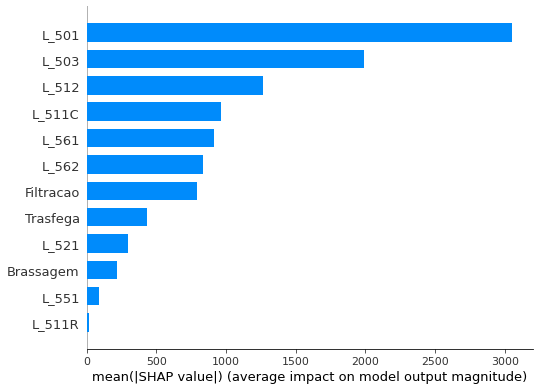

In [11]:
#Plotando a importância das features
shap_values = shap.Explainer(regressor).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar",feature_names=comentarios,show=False)
plt.savefig('barPlot.png')

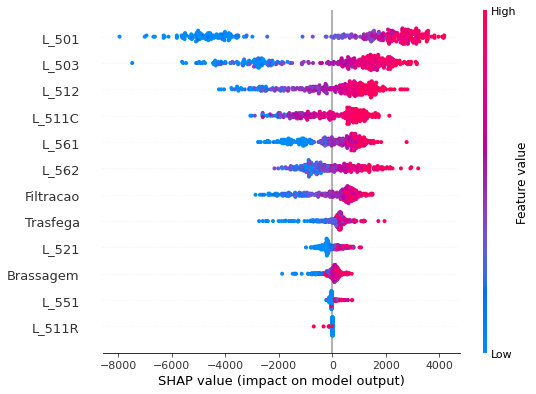

In [12]:
#Plotando como as features impactam o consumo de CO2
f = plt.figure()
shap.summary_plot(shap.TreeExplainer(regressor).shap_values(X_train), X_train,feature_names=comentarios,show=False)
plt.savefig('summaryPlot.png')

100%|===================| 319/320 [01:56<00:00]        

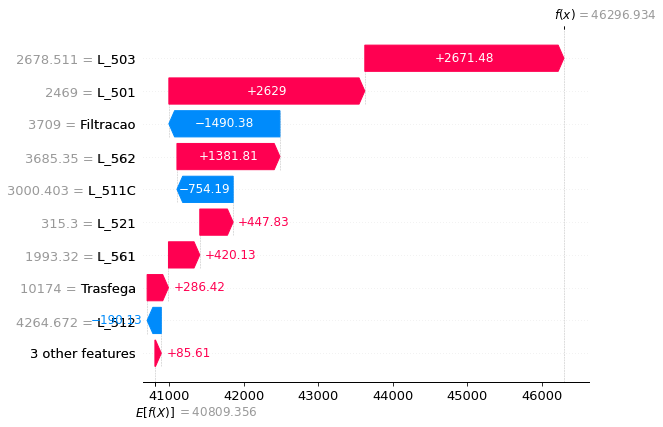

In [14]:
#Plotando o Waterfall para análise
explainer = shap.Explainer(regressor, X_train)
shap_values = explainer(X_train)
shap.plots.waterfall(shap_values[np.random.randint(0,200)],show=False)
plt.savefig('waterfallPlot.png')